py5Canvas tutorial
======



## Installation



#### With jupyter/desktop
To install, it is recommended to use conda inside a custom environment. You can quickly create the environment with:
```
conda env create --name py5 -f https://raw.githubusercontent.com/colormotor/py5canvas/main/environment.yaml
```
You can change the name if desired by switching `py5` with an environment of your choice. Then activate the environment with:
```
conda activate py5
```
and install from [PyPi](https://pypi.org/project/py5canvas/) with
```
pip install py5canvas
```


#### With Google Collab (DO NOT RUN IF WORKING LOCALLY)
When using Google collab you will need to use the following cell to install (based on [this](https://github.com/pygobject/pycairo/issues/39#issuecomment-391830334))


In [2]:
# WARNING!!!! Do NOT do this if you are running jupyter/python locally!!!
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install py5canvas


zsh:1: command not found: apt-get


  Cloning https://github.com/colormotor/py5canvas.git to /private/var/folders/sr/zs7syfx13zzfn32_m3hpw17c0000gn/T/pip-req-build-91y_03cv
  Running command git clone --filter=blob:none --quiet https://github.com/colormotor/py5canvas.git /private/var/folders/sr/zs7syfx13zzfn32_m3hpw17c0000gn/T/pip-req-build-91y_03cv
  Resolved https://github.com/colormotor/py5canvas.git to commit 9d2b6798442664194494fb7dc4e8d3bfd9eb9f27
  Preparing metadata (setup.py) ... done


### Importing 
To test if the installation works, you should now be able to use py5canvas is the notebook by doing

In [1]:
from py5canvas import *

## Basic example



Here is a basic working example that initializes a "canvas" with a given size, creates a black background, draws a circle and then saves and displays the resulting image

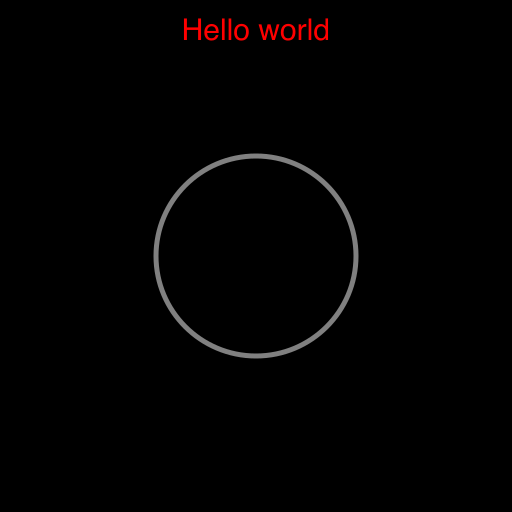

In [2]:
# Create our canvas to draw on
create_canvas(512, 512)
# Clear background to black
background(0)
# Set stroke only and draw circle
stroke(128)
no_fill()
stroke_weight(5)
circle(width/2, height/2, 100)
# Draw red text
fill(255, 0, 0)
text_size(30)
text("Hello world", width/2, 40, align="center")
# Save image
save('test.svg')
show()

The equivalent in P5js would look something like this
```Javascript
function setup() {
  createCanvas(512, 512);
  // Clear background to black
  background(0);
  // Set stroke only and draw circle
  stroke(128);
  noFill();
  strokeWeight(5);
  circle(width/2, height/2, 200);
  // Draw red text
  fill(255, 0, 0);
  noStroke();
  textSize(30);
  textAlign(CENTER);
  text("Hello world", width/2, 40);
}

function draw() {
}
```

You will notice that the programming interface is similar to p5js, although it does not currently handle animations (what would go in the `draw` function). Some of the main difference with respect to p5js are:

-   The naming convention uses `snake_case` rather than `camelCase`. That is, we use underscores to separate terms rather than capitalization. So for example the equivalent of the p5js `strokeWeight(...)` is `stroke_weight(...)`. This is convention is pretty much a standard in Python code.
-   We explicitly set an `align` parameter to the `text` function. This can also be done manually as in the p5 example using `text_align("center")`, but takes advantage of Python's named arguments for conciseness.
-   We need to create a  canvas with `create_canvas` for this system to work, directly in the cell. 


## Step by step examples



### Creating and clearing a Canvas



Once you have imported the `py5canvas` module you can create a blank canvas with `create_canvas`. The background will be grey by default:



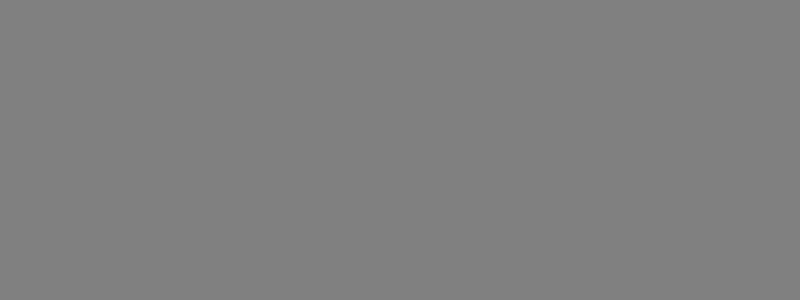

In [19]:
create_canvas(800, 300)
show()

the `show()` method will display the current canvas image below the current notebook cell.


By default the `show` function will display a canvas in its specified size. But sometimes you may want to explicitly specify the size, e.g. if you are working with a very small canvas size.
You can set the size by specifying the `size` argument. However, note that the output will always maintain the aspect ratio of specified for the canvas, e.g. 


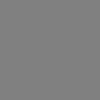

In [4]:
show(size=(100, 100))

By default the `Canvas` object is cleared to grey. We can change this, e.g let&rsquo;s clear to red:

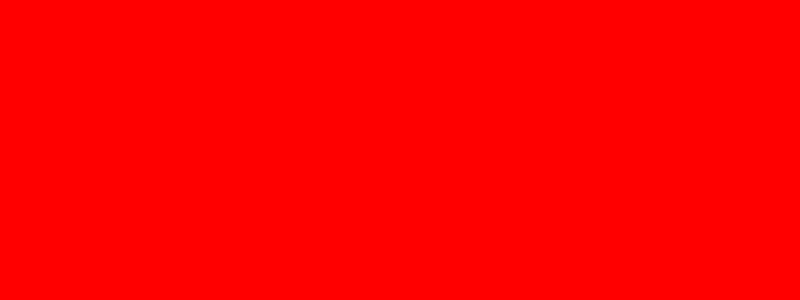

In [5]:
background(255, 0, 0)
show()

### Drawing text



To draw text use the `text` method. We can change size using `text_size` and optionally set the text to be horizontally centered. The text is colored with the current fill color, which is set with the `fill` function:



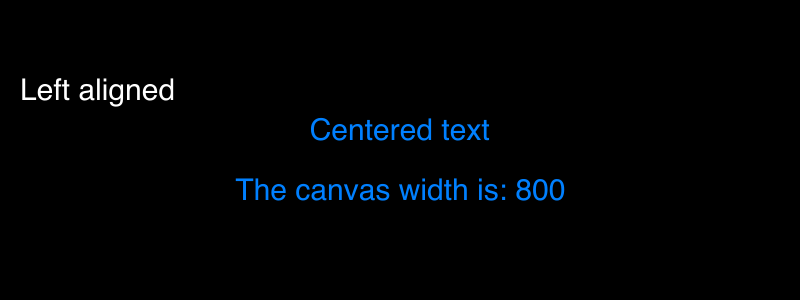

In [6]:
background(0)
text_size(30)
fill(255)
text_align("left")
text("Left aligned", 20, 100)
fill(0, 128, 255)
text_align("center")
text("Centered text", width/2, 140)
text(f"The canvas width is: {width}", width/2, 200) # Using Python formatted strings
show()

P.s. note that in Python, `True` and `False` start with a capital!



### Basic shapes



Similarly to p5js we can draw basic shapes such as rectangles and circles. The main difference is that we specify coordinates as either lists or numpy arrays. E.g. for a rectangle we will use:



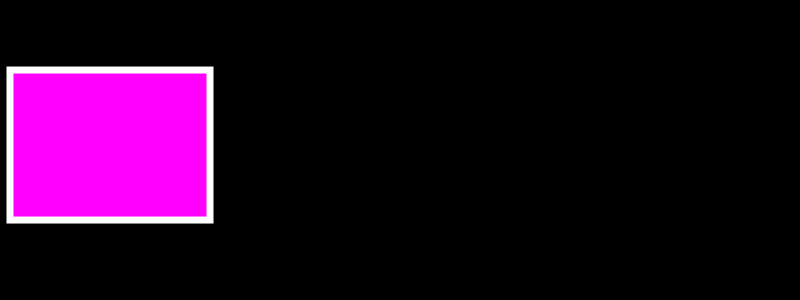

In [7]:
background(0)
fill(255, 0, 255)
stroke(255)
stroke_weight(7)
rectangle(10, 70, 200, 150) # you can use `rect` here as in p5  
show()

The `rectangle` method has two arguments, the `[x,y]` coordinates of the top left corner and the size `[width, height]` of the rectangle.
Here we first set the fill and stroke color with `fill` and `stroke` and then also the stroke thickness with `stroke_weight`.

Let's also add a blue circle to the canvas:

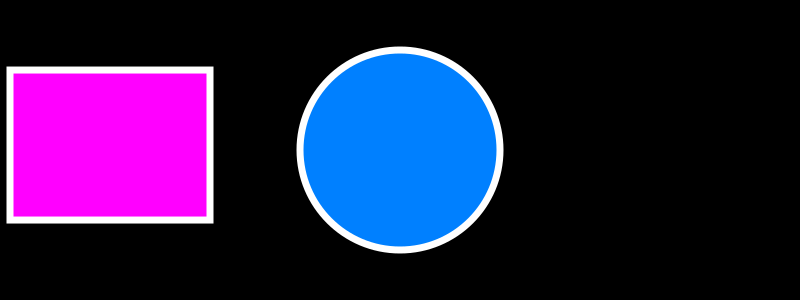

In [8]:
fill(0, 128, 255)
circle(400, height/2, 100)
show()

Note that here we did not clear the canvas so we the rectangle is still visible. This is because once we create a "canvas" with `create_canvas`, it will remain persistent in the notebook cells until we create another one.

### Color modes



By default the canvas uses RGB colors specified in the range between 0 and 255. We can specify colors as single arguments similarly to p5js



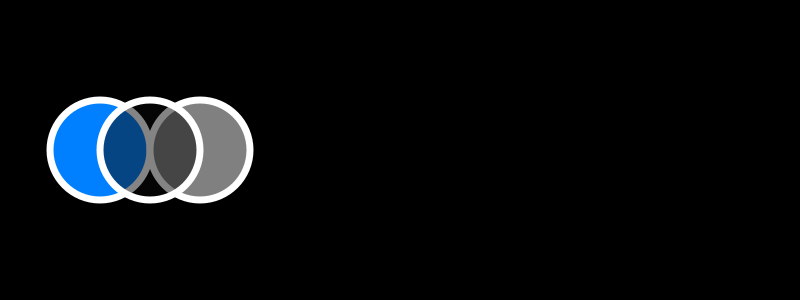

In [9]:
create_canvas(800, 300)
background(0)
fill(0, 128, 255)
circle(100, height/2, 50)
fill(128) # Only one value is grayscale
circle(200, height/2, 50)
fill(10, 128) # Two values is gray, alpha
circle(150, height/2, 50)
show()

Or we can use arrays/lists. For example here we specify a random RGB color with `random_uniform`. Try executing the following cell multiple times:



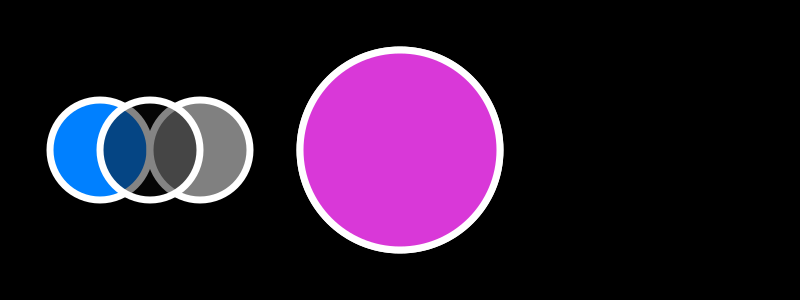

In [11]:
fill(random_uniform(0, 255, 3))
circle(width/2, height/2, 100)
show()

Note that we can add a third argument to the `random_uniform` function specifying that we want an array with 3 random elements (red, green, blue) and not a single number. This is not possible in Processing or P5js.

We can also change &ldquo;color mode&rdquo; and the range of the values. E.g. say we want to draw a series of circles with all the hues. We can set the color mode to hue saturation and brightness (`"hsv"` )
and set the range to be between `0` and `1`:



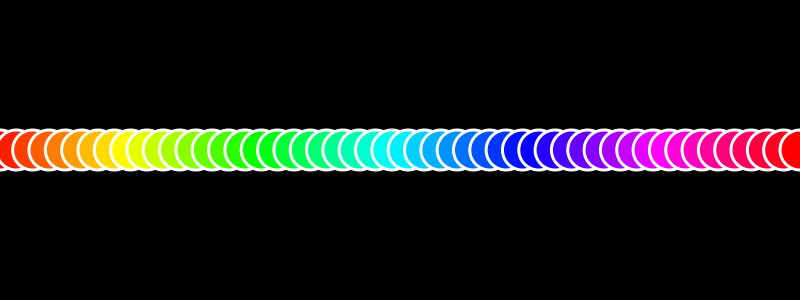

In [20]:
import numpy as np

background(0)
color_mode('hsb', 1.0)
stroke(1.0, 0.0, 1.0) # Zero saturation
stroke_weight(3)
for hue in np.linspace(0, 1, 50):
    fill(hue, 1.0, 1.0)
    circle(hue*width, height/2, 20)
show()
# Set color mode back to rgb for the next examples
color_mode('rgb', 255)

Here we import [NumPy](https://numpy.org), a Python module that is a dependency of py5canvas, and refer to it as `np`. The `np.linspace` function creates a sequence of `50` values between `0` and `1`.


### Polygons and polylines



In p5js, to draw a polygon we would write a series of `vertex(x,y)` calls between a `beginShape()` and `endShape()` pairs. In py5canvas we can work similarly:

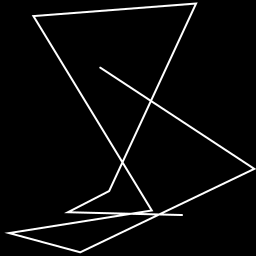

In [15]:
create_canvas(256, 256)
background(0)
no_fill()
stroke(255)
begin_contour()
for i in range(10):
    vertex(random_uniform(0, height, 2))
end_contour()
show()

Alternatively, we can use a list of points or a numpy array to do so. For example to draw a random polyline we can do:

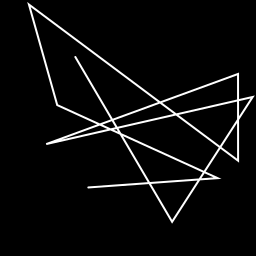

In [17]:
background(0)
no_fill()
stroke(255)
polyline(random_uniform(0, height, (10, 2)))
show()

Note that here we specify the &ldquo;shape&rdquo; of the random array as 10 rows and 2 columns, meaning that we have 10 points, where each point consists of 2 coordinates (x and y).

Alternatively we can simply specify the coordinates of a polygon with a list. For example to draw a triangle we could do:



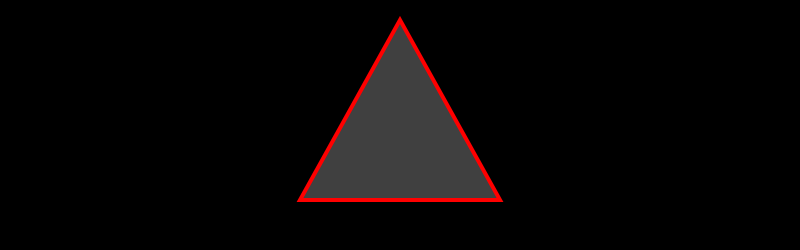

In [29]:
create_canvas(800, 250)
background(0)
fill(64)
stroke(255, 0, 0)
stroke_weight(4)
polygon( [[400, 20],
            [500, 200],
            [300, 200]] )
show()

Here we are using the `polygon` function that produces a closed polygon. Alternatively we can also use `polyline(points, closed=True)`.

Now let&rsquo;s draw a series of regular polygons using a Python syntax known as [list comprehensions](https://www.w3schools.com/python/python_lists_comprehension.asp):



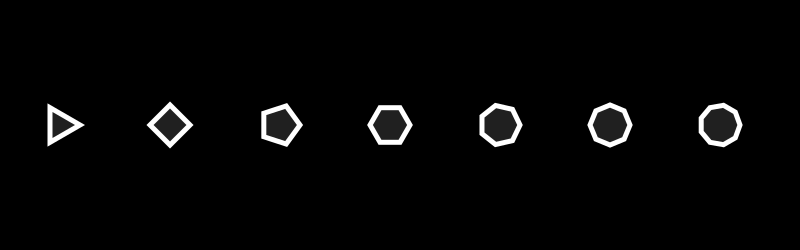

In [30]:
background(0)
fill(32)
stroke(255)
stroke_weight(5)
start_sides, end_sides = 3, 10
for sides in range(start_sides, end_sides):
    radius = 30
    x = (width - radius) * (sides - start_sides)/(end_sides - start_sides)
    y = height/2
    # This creates the coordinates of the polygon
    points = [[np.cos(t*np.pi*2)*20 + x + radius*2,
               np.sin(t*np.pi*2)*20 + y] for t in np.linspace(0, 1, sides+1)]
    polygon(points)
show()

Here we could have filled the points with a loop of the type:



In [31]:
points = []
for t in np.linspace(0, 1, sides+1):
    points.append([np.cos(t*np.pi*2)*20 + x + radius*2,
                   np.sin(t*np.pi*2)*20 + y])

The above is equivalent but more concise.



### Shapes with holes



We can draw shapes with holes by using combining different shapes betwen a `begin_shape()` and an `end_shape()` pair. For example here we &ldquo;dig&rdquo; a circular hole into a rectangle.



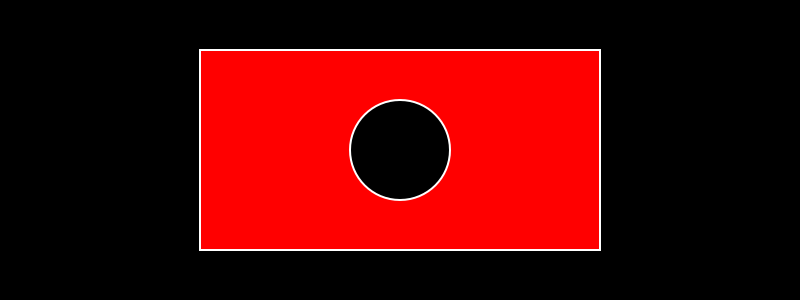

In [32]:
create_canvas(800, 300)

background(0)
fill(255, 0, 0)
stroke(255)
begin_shape()
rect_mode('center') # Note that rect mode accepts a string as an input 
rectangle(width/2, height/2, 400, 200)
circle(width/2, height/2, 50)
end_shape()
show()

By default, holes will be computed according to the [&ldquo;even odd&rdquo; fill rule](https://en.wikipedia.org/wiki/Even–odd_rule). The even-odd fill rule checks if a point is inside a shape by drawing a "ray" (a line) from the point outward. If the ray crosses the shape's outline an odd number of times, the point is inside; if it crosses an even number of times, the point is outside.


### Images



The canvas object allows to display images encoded as numpy arrays. For example, we could create a grayscale image
with random values between 0 and 1 and then display it with:



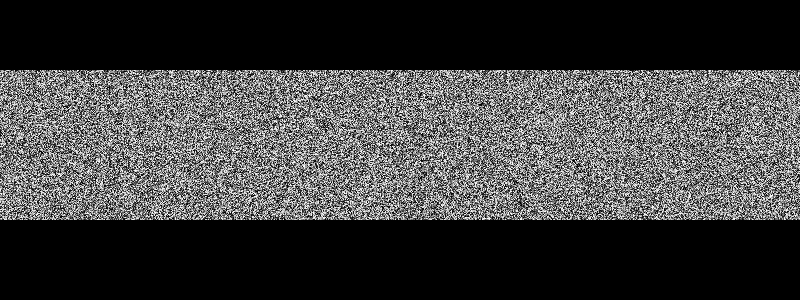

In [33]:
import numpy as np
create_canvas(800, 300)
background(0)
im = random_uniform(0, 1, (150, width))
image(im, 0, 70)
show()

Note that size (the `.shape` property) in numpy arrays is specified as `(rows, columns)` so we specify the size of the array as `(height, width)`. The second argument to the `image` method is the position of the top left corner of the image.



#### Loading images



We can also load an image by using `load_image` similarly to Processing. Internally we create an image using [Pillow](https://pypi.org/project/Pillow/) library, so all the functionalities of the library are available.



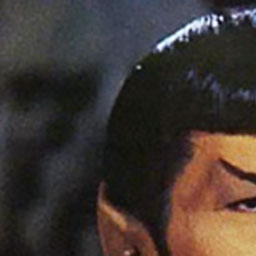

In [36]:
create_canvas(256, 256)
background(0)
im = load_image('images/spock.jpg')
image(im, 0, 0)
show()

Here we draw the image with its original size so it appears cropped. You can resize it by specifying width and height arguments



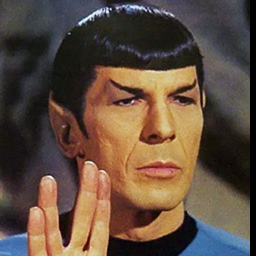

In [37]:
background(0)
image(im, 0, 0, im.width/2, im.height/2)
show()

The same function also accepts numpy arrays as a descriptor of images, for instance we can convert the RGB `im` to a numpy array simply with

In [38]:
im = np.array(im)

and the array will be 3d and have a `np.uint8` data type:



In [39]:
print(im.shape, im.dtype)

(688, 500, 3) uint8


Arrays have the advantage that we can easily do mathematical operations on them. Dividing the array by 255 will result in a floating point array (rather than 8 bit int), and the `Canvas` object will interpret these similarly to 8 bit per pixel arrays:



float64


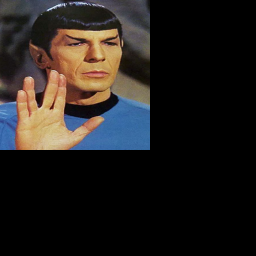

In [40]:
fim = im/255
print(fim.dtype)
background(0)
image(fim, 0, 0, 150, 150)
show()

Even though we scaled the image, we can render it identically. Internally the Canvas object will check the `dtype` property of the array and expect values between 0 and 255 if `dtype` is `np.uint8` and values between 0 and 1 otherwise. The `[0,1]` range is convenient for certain operations, for example we may raise the image to a power or take it&rsquo;s cosine (whatever meaning this may have):



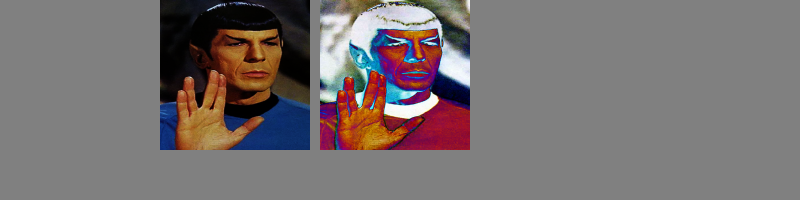

In [47]:
create_canvas(800, 200)
image(fim**2, 160, 0, 150, 150)
image(np.cos(fim*np.pi*2)*0.5 + 0.5, 320, 0, 150, 150)
show()

We can also scale each RGB channel separately with a multiplication, for example:



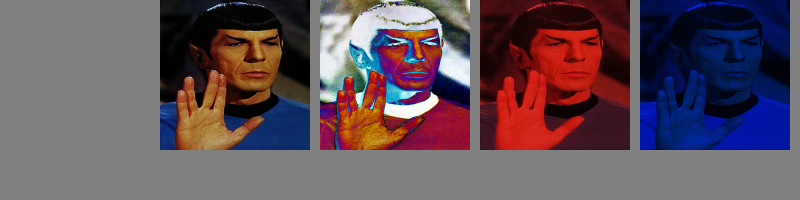

In [48]:
image(fim*[1.0, 0.2, 0.2], 480, 0, 150, 150)
image(fim*[0.0, 0.2, 1.0], 640, 0, 150, 150)
show()

### Transformations

The `Canvas` object also enables transformations similarly to p5js. E.g. let's draw rectangles revolving around the center of the canvas:

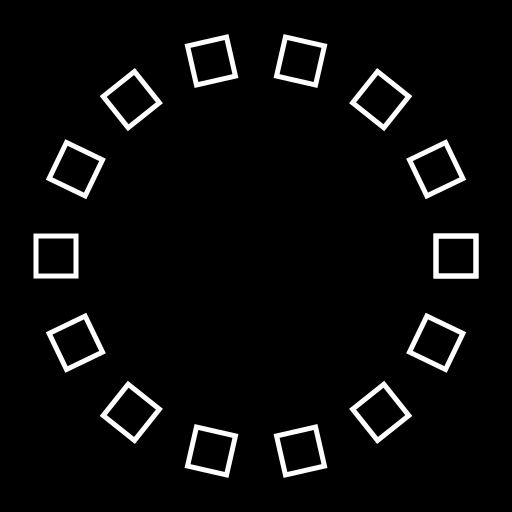

In [49]:
create_canvas(512, 512)
background(0)
no_fill()
stroke(255)
stroke_weight(5.0)
# Shift origin to center
translate(width/2, height/2)
for rot in np.linspace(0, np.pi*2, 15):
    push() # Push transformation
    rotate(rot) # Rotation is specified in radians, use rotate_deg if you want to use degrees
    translate(200, 0)
    rectangle(-20, -20, 40, 40)
    pop() # Pop transformation
show()

Similarly to p5js we can use `push` and `pop` to save and restore the state of the transformation and differently from p5js we use lists or numpy arrays to specify positions and sizes. Alternatively, we can use the `with` Python syntax without requiring to use `pop`:

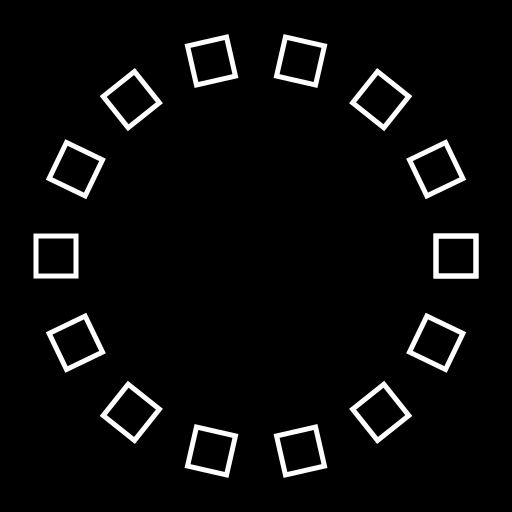

In [50]:
create_canvas(512, 512)
background(0)
no_fill()
stroke(255)
stroke_weight(5.0)
# Shift origin to center
translate(width/2, height/2)
for rot in np.linspace(0, np.pi*2, 15):
    with push(): # Push transformation
        rotate(rot) # Rotation is specified in radians, use rotate_deg if you want to use degrees
        translate(200, 0)
        rectangle(-20, -20, 40, 40)
show()

### Recap



Here is a canvas example with some of the functionalities discussed above:



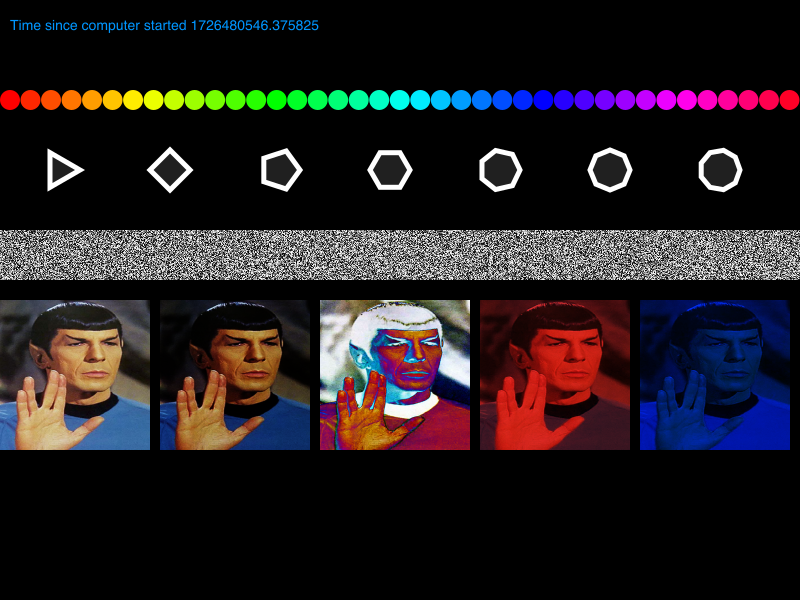

In [53]:
import time
create_canvas(800, 600)
background(0)
text_size(14)
fill(0, 150, 255)
# A formmatted string example
text(f"Time since computer started {time.time()}", [10, 30])
# Some colored squares using np.linspace for a loop
# Set color mode to hue-saturation-brightness with a scale of 1
color_mode('hsv', 1.0)
no_stroke()
for t in np.linspace(0, 1, 40):
    fill(t, 1.0, 1.0)
    circle(t*width+10, 100, 10)
# Go back to rgb with scale of 255
color_mode('rgb', 255)
# Draw a series of closed regular polygons with increasing number of sides
fill(32)
stroke(255)
stroke_weight(5)
start_sides, end_sides = 3, 10
for sides in range(start_sides, end_sides):
    radius = 30
    x = (width - radius) * (sides - start_sides)/(end_sides - start_sides)
    y = 170
    # This creates the coordinates of the polygon
    points = [[np.cos(t*np.pi*2)*20 + x + radius*2,
                np.sin(t*np.pi*2)*20 + y] for t in np.linspace(0, 1, sides+1)]
    polygon(points)
# Create a numpy array with random values between 0 and 1 and treat it as an image
# Note that size is specified as rows, columns (height, width)
im = np.random.uniform(0, 1, (50, width))
image(im, [0, 230])
# We can also load an image. Here we use PIL, but there are many other methods
im = np.array(load_image('images/spock.jpg'))
image(im, 0, 300, 150, 150)
# Because the image is a numpy array we can perform operations on it
# The Canvas object will also work with images that are in the [0,1] range,
# rather than [0, 255] range. This will make performing math on the pixels easier
im = im/255
image(im**2, 160, 300, 150, 150)
image(np.cos(im*np.pi*2)*0.5 + 0.5, 320, 300, 150, 150)
# Here we muliply each channel (RGB) by a value
image(im*[1.0, 0.2, 0.2], 480, 300, 150, 150)
image(im*[0.0, 0.2, 1.0], 640, 300, 150, 150)
# We can draw holes by combining draw calls
show()

## Using the `Canvas` object 

When importing `py5canvas` globally with `from py5canvas import *` we are "injecting" code into the notebook, allowing us to write code with a syntax as similar as possible to P5js/Processing. 
This is useful for rapidly prototyping simple scripts, but it can become problematic because this approach takes over functions/variables with very common names that one might want to use for other purposes.
Take for example function names like `scale`, `rotate`. 

In practice, when importing py5canvas in this way, we are creating a `Canvas` and globally expose all of its methods to the notebook. A more verbose but "cleaner" approach is to explicitly import the `Canvas` object and access its functionalities using dot notation:

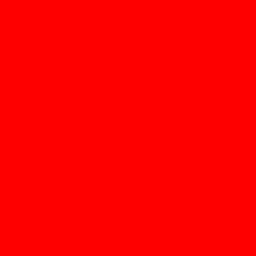

In [55]:
from py5canvas import Canvas
c = Canvas(256, 256)
c.background(255, 0, 0)
c.show()

All the functionalities discussed above will be then available through the `Canvas` object interface.